# Manahil Fatima Anwar
# 20K-0134
# BAI-7A
# CV Lab 07

## Lab Tasks

### Task 01

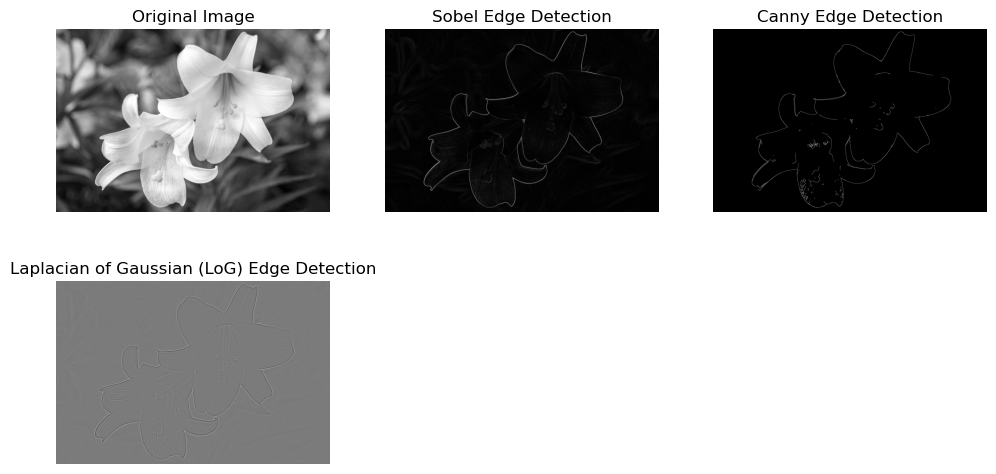

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("iimage01.jpg", cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
edge_image = cv2.magnitude(sobel_x, sobel_y)

canny_edge_image = cv2.Canny(image, 100, 200)

sigma = 1.5
smoothed_image = cv2.GaussianBlur(image, (0, 0), sigma)
laplacian = cv2.Laplacian(smoothed_image, cv2.CV_64F)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap = "gray")
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edge_image, cmap = "gray")
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(canny_edge_image, cmap = "gray")
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(laplacian, cmap = "gray")
plt.title('Laplacian of Gaussian (LoG) Edge Detection')
plt.axis('off')

plt.show()

### Task 02

C:\Users\ABC\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

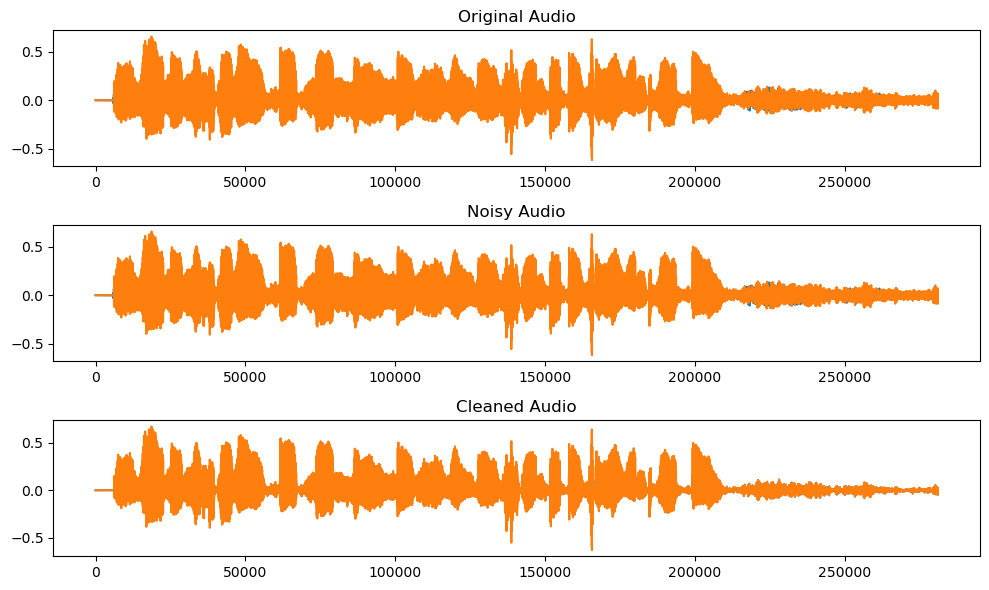

In [2]:
import numpy as np
import pywt
import pywt.data
import matplotlib.pyplot as plt
import soundfile as sf

audio, sample_rate = sf.read(r"C:\Users\ABC\Desktop\BAI\BAI-S7\CV Lab\Lab 07\Standard recording 2.mp3")

wavelet = "db4"
level = 5

coeffs = pywt.wavedec(audio, wavelet, level=level)

threshold = 0.1

thresholded_coeffs = [pywt.threshold(c, threshold, mode="soft") for c in coeffs]

denoised_audio = pywt.waverec(thresholded_coeffs, wavelet)

sf.write(r"C:\Users\ABC\Desktop\BAI\BAI-S7\CV Lab\Lab 07\clean_audio.mp3", denoised_audio, sample_rate)

import sounddevice as sd
sd.play(denoised_audio, sample_rate)
sd.wait()

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.title("Original Audio")
plt.plot(audio)

plt.subplot(3, 1, 2)
plt.title("Noisy Audio")
plt.plot(audio)

plt.subplot(3, 1, 3)
plt.title("Cleaned Audio")
plt.plot(denoised_audio)

plt.tight_layout()
plt.show

### Task 03

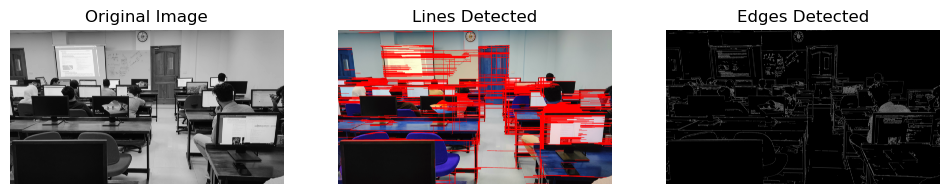

In [3]:
img = cv2.imread('image02.jpg', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 200)

lines = cv2.HoughLinesP(edges, 0.1, np.pi/180, 80, minLineLength=10, maxLineGap=150)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap="gray")
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img, cmap="gray")
plt.title("Lines Detected")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap="gray")
plt.title("Edges Detected")
plt.axis('off')

plt.show()

### Task 04

(-0.5, 4623.5, 2607.5, -0.5)

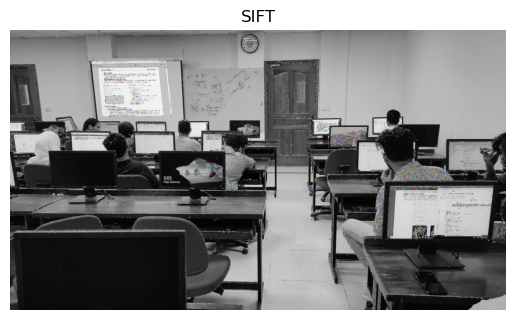

In [4]:
image = cv2.imread("image02.jpg", cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(image, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

plt.imshow(image_with_keypoints)
plt.title("SIFT")
plt.axis('off')

# Match the descriptors with a pre-existing database
# Implement feature matching here using a database of known computer systems and components

# If matches are found, identify and label the computer systems and components
# Implement identification based on the matched features

# Maintain an inventory based on the identified and labeled computer systems and components
# Update the inventory based on the identified computer systems and components

### Task 05

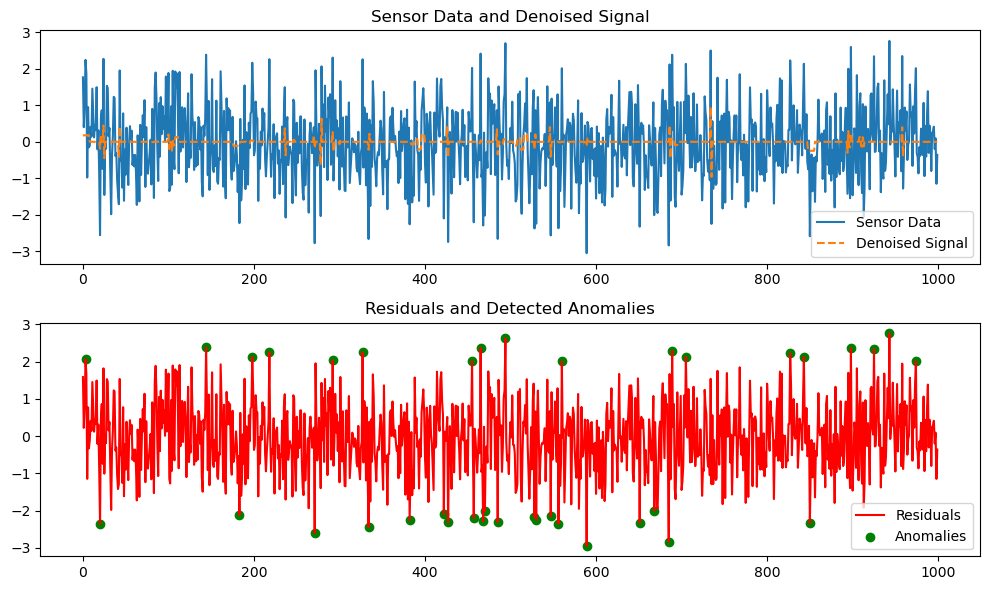

Detected Anomalies: [  3  20 144 183 198 218 271 292 327 334 382 422 427 455 457 465 468 470
 485 494 528 530 547 556 560 589 651 668 685 689 705 827 843 850 898 925
 943 974]


In [5]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a sample sensor dataset
np.random.seed(0)
sensor_data = np.random.normal(0, 1, 1000)

# Choose the wavelet family and decomposition level
# wavelet ="db4"
wavelet = "haar"
level = 3

# Perform the wavelet transformation
coeffs = pywt.wavedec(sensor_data, wavelet, level=level)

# Set a threshold for anomaly detection 
threshold = 2.0

# Apply thresholding to the wavelet coefficients
thresholded_coeffs = [pywt.threshold(c, threshold, mode="soft") for c in coeffs]

# Reconstruct the denoised signal
denoised_signal = pywt.waverec(thresholded_coeffs, wavelet)

# Calculate the residuals (differences between original and denoised signal)
residuals = sensor_data - denoised_signal

# Detect anomalies based on the residuals and threshold
anomalies = np.where(np.abs(residuals) > threshold)[0]

# Plot the sensor data, denoised signal, and detected anomalies
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(sensor_data, label="Sensor Data")
plt.plot(denoised_signal, label="Denoised Signal", linestyle="--")
plt.legend()
plt.title("Sensor Data and Denoised Signal")

plt.subplot(2, 1, 2)
plt.plot(residuals, label="Residuals", color="red")
plt.scatter(anomalies, residuals[anomalies], color="green", label="Anomalies")
plt.legend()
plt.title("Residuals and Detected Anomalies")

plt.tight_layout()
plt.show()

# Output detected anomaly indices

print("Detected Anomalies:", anomalies)

## Home Tasks

### Task 01

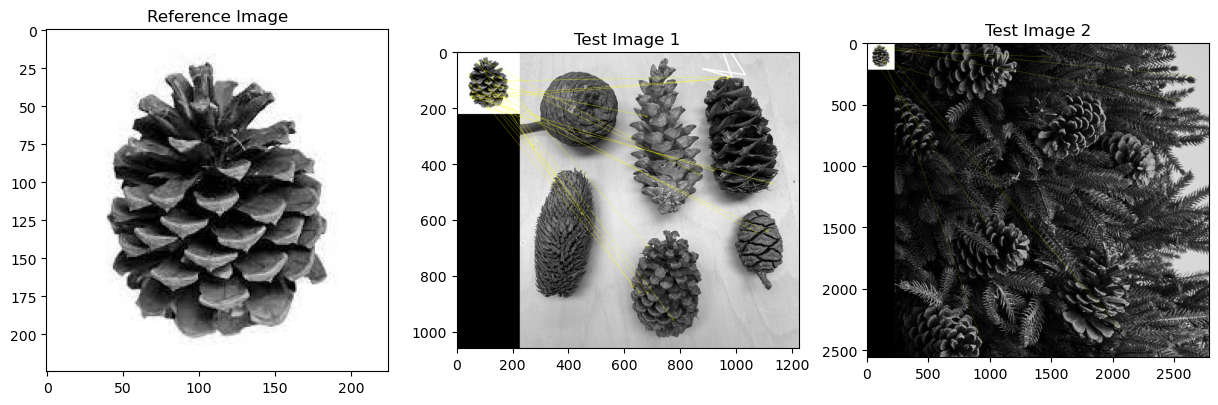

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_matches(img1, kp1, img2, kp2, matches):
    rows1, cols1 = img1.shape
    rows2, cols2 = img2.shape

    out = np.zeros((max([rows1, rows2]), cols1 + cols2, 3), dtype='uint8')
    out[:rows1, :cols1] = np.dstack([img1, img1, img1])
    out[:rows2, cols1:] = np.dstack([img2, img2, img2])

    for mat in matches:
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx
        (x1, y1) = kp1[img1_idx].pt
        (x2, y2) = kp2[img2_idx].pt

        cv2.circle(out, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(out, (int(x2) + cols1, int(y2)), 4, (0, 255, 255), 1)
        cv2.line(out, (int(x1), int(y1)), (int(x2) + cols1, int(y2)), (0, 255, 255), 1)

    return out

def sift_detector(reference_image, test_images):
    sift = cv2.SIFT_create()
    
    kp1, des1 = sift.detectAndCompute(reference_image, None)

    fig, axs = plt.subplots(1, len(test_images) + 1, figsize=(15, 6))

    axs[0].imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Reference Image')

    for i, test_image in enumerate(test_images):
        kp2, des2 = sift.detectAndCompute(test_image, None)

        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        good_matches = []
        for m, n in matches:
            if m.distance < 0.8 * n.distance:
                good_matches.append(m)

        if len(good_matches) > 5:
            src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
            dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            matchesMask = mask.ravel().tolist()

            h, w = reference_image.shape
            pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
            dst = cv2.perspectiveTransform(pts, M)

            test_image = cv2.polylines(test_image, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
        else:
            print("Not enough matches are found for test image {} - {} matches found".format(i, len(good_matches)))

        output_image = draw_matches(reference_image, kp1, test_image, kp2, good_matches)
        axs[i + 1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        axs[i + 1].set_title(f'Test Image {i + 1}')

    plt.show()

reference_image = cv2.imread('pine cone_ref.jpg', 0)
test_images = [cv2.imread('pine cone_test01.jpg', 0), cv2.imread('pine cone_test02.jpg', 0)]
sift_detector(reference_image, test_images)

### Task 02

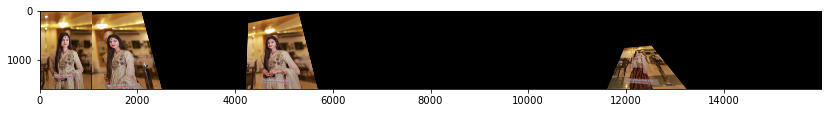

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image file paths containing your images

image_paths = ["myimg1.jpeg", "myimg2.jpeg", "myimg3.jpeg", "myimg4.jpeg"]

# Initialize SIFT
sift = cv2.SIFT_create()

# Initialize the first image
stitched_image = cv2.imread(image_paths[0], cv2.IMREAD_COLOR)

for i in range(1, len(image_paths)):
    # Load the next image
    image2 = cv2.imread(image_paths[i], cv2.IMREAD_COLOR)

    # Detect and compute keypoints and descriptors for both images
    keypoints1, descriptors1 = sift.detectAndCompute(stitched_image, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # Create a BFMatcher (Brute-Force Matcher)
    bf = cv2.BFMatcher()

    # Match descriptors between the two images
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # If there are enough good matches, consider it a match
    if len(good_matches) > 10:  # You can adjust this threshold
        # Extract matched keypoints' coordinates
        pts1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        pts2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Find the perspective transformation (homography) between the two images
        M, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC, 5.0)

        # Warp the second image to align with the first image
        image2_warped = cv2.warpPerspective(image2, M, (stitched_image.shape[1] + image2.shape[1], stitched_image.shape[0]))

        # Append the two images horizontally
        stitched_image = cv2.hconcat([stitched_image, image2_warped])

# Save the final stitched image
cv2.imwrite("panoramic_image.jpg", stitched_image)

# Display the panorama
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
plt.show()


### Task 03

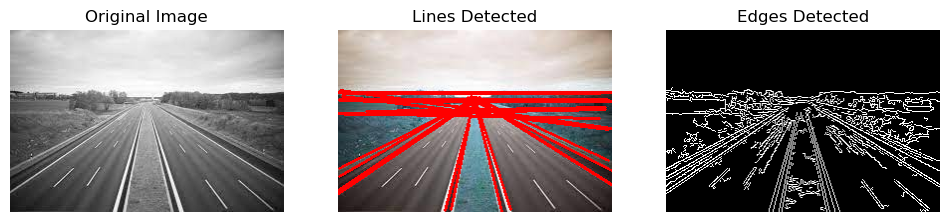

In [7]:
img = cv2.imread('lanes.jpg', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 200)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=5, maxLineGap=100)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap="gray")
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img, cmap="gray")
plt.title("Lines Detected")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap="gray")
plt.title("Edges Detected")
plt.axis('off')

plt.show()

### Task 04

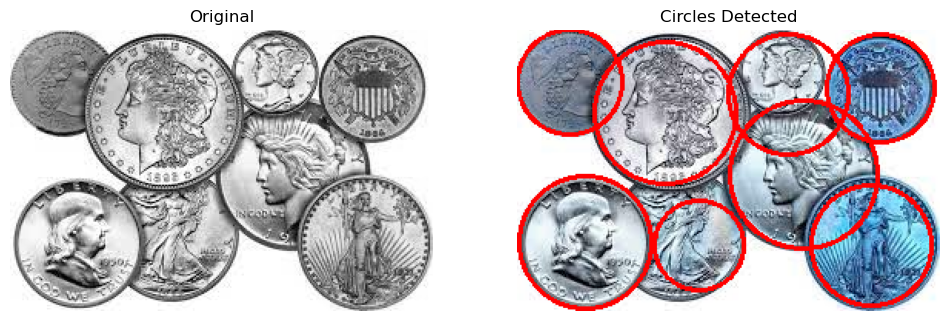

In [8]:
img = cv2.imread('coins.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 50, param1 = 100, param2 = 30, minRadius = 1, maxRadius = 70)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 2)
        #cv2.circle(img, (i[0], i[1]), 2, (255, 0, 0), 5)
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('Circles Detected')
plt.axis('off')
plt.show()

### Task 05

In [9]:
def detect_boundaries(video_stream, security_zone_coordinates):
    x1, y1, x2, y2 = security_zone_coordinates

    cap = cv2.VideoCapture(video_stream)

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        edges = cv2.Canny(gray, 50, 150)

        if np.any(edges[y1:y2, x1:x2] == 255):
            print("Unauthorized object detected!")
        cv2.imshow('Boundary Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
security_zone_coordinates = (100, 100, 500, 500)

video_stream = r'C:\Users\ABC\Videos\Captures\(3) Example of Hi-Definition Video Surveillance of a Factory Floor - by CCTVDOC.COM - YouTube - Google Chrome 2023-10-25 17-24-07.mp4'  # Replace with the video file path or 0 for the default camera

detect_boundaries(video_stream, security_zone_coordinates)

Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthorized object detected!
Unauthoriz

### Task 06

The screen 1 is OFF
The screen 2 is OFF
The screen 3 is OFF
The screen 4 is OFF


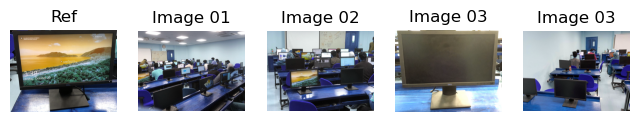

In [10]:
def is_screen_on(current_image, reference_image, threshold=0.9):
    gray_current = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    gray_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

    ssim_index = cv2.matchTemplate(gray_current, gray_reference, cv2.TM_CCOEFF_NORMED)[0][0]

    if ssim_index > threshold:
        return True
    else:
        return False

reference_image = cv2.imread('img4.jpg')

current_screen_1 = cv2.imread('img1.jpg')
current_screen_2 = cv2.imread('img2.jpg')
current_screen_3 = cv2.imread('img3.jpg')
current_screen_4 = cv2.imread('img5.jpg')

screens = [current_screen_1, current_screen_2, current_screen_3, current_screen_4]
for i, screen in enumerate(screens, start=1):
    if screen is not None:
        is_on = is_screen_on(screen, reference_image)
        if is_on:
            print(f"The screen {i} is ON")
        else:
            print(f"The screen {i} is OFF")
    else:
        print(f"Failed to capture the current screen {i}.")
        
plt.figure(figsize = (8, 4))
plt.subplot(1, 5, 1)
plt.imshow(reference_image, cmap='gray')
plt.title('Ref')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(current_screen_1, cmap='gray')
plt.title('Image 01')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(current_screen_2, cmap='gray')
plt.title('Image 02')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(current_screen_3, cmap='gray')
plt.title('Image 03')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(current_screen_4, cmap='gray')
plt.title('Image 03')
plt.axis('off')
plt.show()

### Task 07

In [17]:
reference_image_path = 'paupau img.jpg'
reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detection(video_path):
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

video_path = 'paupau vid.mp4'
detection(video_path)